In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk import word_tokenize, sent_tokenize, pos_tag
from nltk.corpus import stopwords
from transformers import pipeline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import seaborn as sns

In [8]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

Source for the article: https://www.ibm.com/think/topics/natural-language-processing

In [87]:
Article = '''Natural language processing (NLP) is a subfield of computer science and artificial intelligence (AI) that uses machine learning to enable computers to understand and communicate with human language.

NLP enables computers and digital devices to recognize, understand and generate text and speech by combining computational linguistics, the rule-based modeling of human language together with statistical modeling, machine learning and deep learning.

NLP research has helped enable the era of generative AI, from the communication skills of large language models (LLMs) to the ability of image generation models to understand requests. NLP is already part of everyday life for many, powering search engines, prompting chatbots for customer service with spoken commands, voice-operated GPS systems and question-answering digital assistants on smartphones such as Amazon’s Alexa, Apple’s Siri and Microsoft’s Cortana.

NLP also plays a growing role in enterprise solutions that help streamline and automate business operations, increase employee productivity and simplify business processes.
Benefits of NLP
NLP makes it easier for humans to communicate and collaborate with machines, by allowing them to do so in the natural human language they use every day. This offers benefits across many industries and applications.

Automation of repetitive tasks
Improved data analysis and insights
Enhanced search
Content generation
Automation of repetitive tasks
NLP is especially useful in fully or partially automating tasks like customer support, data entry and document handling. For example, NLP-powered chatbots can handle routine customer queries, freeing up human agents for more complex issues. In document processing, NLP tools can automatically classify, extract key information and summarize content, reducing the time and errors associated with manual data handling. NLP facilitates language translation, converting text from one language to another while preserving meaning, context and nuances.

Improved data analysis
NLP enhances data analysis by enabling the extraction of insights from unstructured text data, such as customer reviews, social media posts and news articles. By using text mining techniques, NLP can identify patterns, trends and sentiments that are not immediately obvious in large datasets. Sentiment analysis enables the extraction of subjective qualities, attitudes, emotions, sarcasm, confusion or suspicion from text. This is often used for routing communications to the system or the person most likely to make the next response.

This allows businesses to better understand customer preferences, market conditions and public opinion. NLP tools can also perform categorization and summarization of vast amounts of text, making it easier for analysts to identify key information and make data-driven decisions more efficiently.'''
Article

'Natural language processing (NLP) is a subfield of computer science and artificial intelligence (AI) that uses machine learning to enable computers to understand and communicate with human language.\n\nNLP enables computers and digital devices to recognize, understand and generate text and speech by combining computational linguistics, the rule-based modeling of human language together with statistical modeling, machine learning and deep learning.\n\nNLP research has helped enable the era of generative AI, from the communication skills of large language models (LLMs) to the ability of image generation models to understand requests. NLP is already part of everyday life for many, powering search engines, prompting chatbots for customer service with spoken commands, voice-operated GPS systems and question-answering digital assistants on smartphones such as Amazon’s Alexa, Apple’s Siri and Microsoft’s Cortana.\n\nNLP also plays a growing role in enterprise solutions that help streamline a



---

# **Converting text to lower case.**


---



In [88]:
article = Article.lower()
article

'natural language processing (nlp) is a subfield of computer science and artificial intelligence (ai) that uses machine learning to enable computers to understand and communicate with human language.\n\nnlp enables computers and digital devices to recognize, understand and generate text and speech by combining computational linguistics, the rule-based modeling of human language together with statistical modeling, machine learning and deep learning.\n\nnlp research has helped enable the era of generative ai, from the communication skills of large language models (llms) to the ability of image generation models to understand requests. nlp is already part of everyday life for many, powering search engines, prompting chatbots for customer service with spoken commands, voice-operated gps systems and question-answering digital assistants on smartphones such as amazon’s alexa, apple’s siri and microsoft’s cortana.\n\nnlp also plays a growing role in enterprise solutions that help streamline a

# **Tokenization**

In [89]:
tokens = word_tokenize(article)
for i in range(10):
  print(i+1, tokens[i])

1 natural
2 language
3 processing
4 (
5 nlp
6 )
7 is
8 a
9 subfield
10 of


In [90]:
sentences = sent_tokenize(article)
for i in range(5):
  print(i+1, sentences[i])

1 natural language processing (nlp) is a subfield of computer science and artificial intelligence (ai) that uses machine learning to enable computers to understand and communicate with human language.
2 nlp enables computers and digital devices to recognize, understand and generate text and speech by combining computational linguistics, the rule-based modeling of human language together with statistical modeling, machine learning and deep learning.
3 nlp research has helped enable the era of generative ai, from the communication skills of large language models (llms) to the ability of image generation models to understand requests.
4 nlp is already part of everyday life for many, powering search engines, prompting chatbots for customer service with spoken commands, voice-operated gps systems and question-answering digital assistants on smartphones such as amazon’s alexa, apple’s siri and microsoft’s cortana.
5 nlp also plays a growing role in enterprise solutions that help streamline a

# **Removing Stop Words & non-alphanumeric tokens**

In [91]:
temp = []
for token in tokens:
  if token.isalnum():
    temp.append(token)

stop_words = set(stopwords.words('english'))
filtered_tokens = []
for token in temp:
  if token not in stop_words:
    filtered_tokens.append(token)

for i in range(10):
  print(i+1, filtered_tokens[i])

1 natural
2 language
3 processing
4 nlp
5 subfield
6 computer
7 science
8 artificial
9 intelligence
10 ai


In [92]:
pos_tags = pos_tag(filtered_tokens)
for i in range(10):
  print(i+1, pos_tags[i])

1 ('natural', 'JJ')
2 ('language', 'NN')
3 ('processing', 'NN')
4 ('nlp', 'RB')
5 ('subfield', 'VBD')
6 ('computer', 'NN')
7 ('science', 'NN')
8 ('artificial', 'JJ')
9 ('intelligence', 'NN')
10 ('ai', 'JJ')


# **Text Summarisation**

In [108]:
summary_pipeline = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

summary = summary_pipeline(Article, max_length=120, min_length=30, do_sample=False) # do_sample is used for fixed o/p ..?

summary = summary[0]['summary_text']
summary_sentences = sent_tokenize(summary)
print("Summary")
print("-"*25)
for i in range(len(summary_sentences)):
  print(summary_sentences[i])
print("-"*25)

Device set to use cpu


Summary
-------------------------
 Natural language processing (NLP) is a subfield of computer science and artificial intelligence (AI) that uses machine learning to enable computers to understand and communicate with human language .
NLP is already part of everyday life for many, powering search engines, prompting chatbots for customer service with spoken commands .
-------------------------


# **Generating a Word Cloud**

In [93]:
filtered_text = " ".join(filtered_tokens)
filtered_text

'natural language processing nlp subfield computer science artificial intelligence ai uses machine learning enable computers understand communicate human language nlp enables computers digital devices recognize understand generate text speech combining computational linguistics modeling human language together statistical modeling machine learning deep learning nlp research helped enable era generative ai communication skills large language models llms ability image generation models understand requests nlp already part everyday life many powering search engines prompting chatbots customer service spoken commands gps systems digital assistants smartphones amazon alexa apple siri microsoft cortana nlp also plays growing role enterprise solutions help streamline automate business operations increase employee productivity simplify business processes benefits nlp nlp makes easier humans communicate collaborate machines allowing natural human language use every day offers benefits across ma

(np.float64(-0.5), np.float64(799.5), np.float64(499.5), np.float64(-0.5))

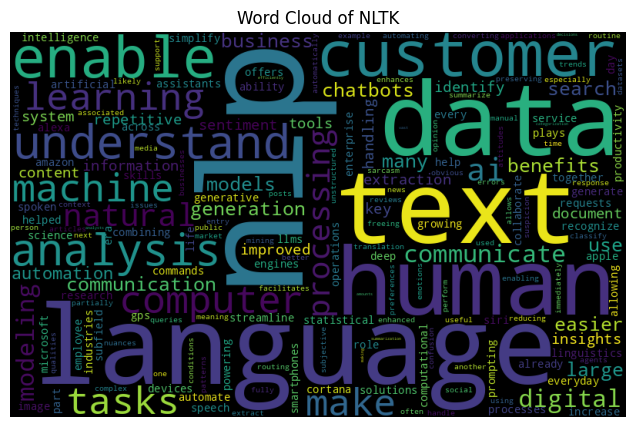

In [94]:
word_cloud = WordCloud(height=500, width=800).generate(filtered_text)
plt.figure(figsize=(10,5))
plt.title("Word Cloud of NLTK")
plt.imshow(word_cloud)
plt.axis('off')

# **Generating Frequency Chart**

Text(0.5, 1.0, 'Frequency Chart of Top-5 Words')

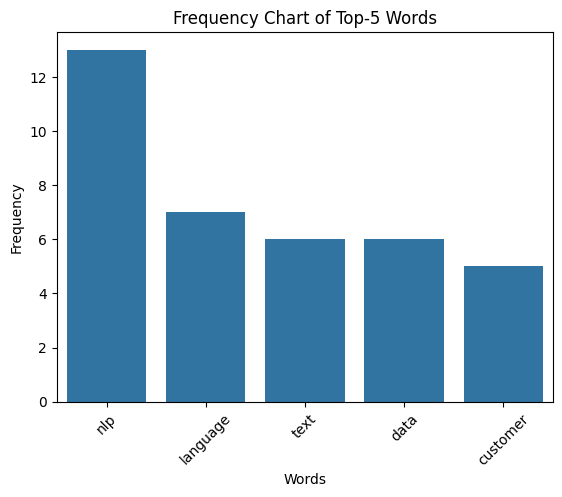

In [97]:
freq_words = FreqDist(filtered_tokens).most_common(5)

words = []
freq = []
for word, frequency in freq_words:
  words.append(word)
  freq.append(frequency)

sns.barplot(x=words, y=freq)
plt.xlabel("Words")
plt.xticks(rotation=45)
plt.ylabel("Frequency")
plt.title("Frequency Chart of Top-5 Words")